<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/3_machine_learning/clase_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üìå Algoritmo **Naive Bayes**

Naive Bayes es una **familia de clasificadores probabil√≠sticos** basados
en el teorema de Bayes. Se llama *naive* ("ingenuo") porque asume que
todas las caracter√≠sticas (features) son **independientes entre s√≠**
dado el valor de la clase.

Aunque esta suposici√≥n rara vez es cierta en la pr√°ctica,
sorprendentemente el algoritmo funciona muy bien en muchos problemas
reales.

------------------------------------------------------------------------

## üîπ Teorema de Bayes

El teorema de Bayes nos dice que:

\[ P(C\|X) = `\frac{P(X|C) \cdot P(C)}{P(X)}`{=tex} \]

Donde:

-   ( P(C\|X) ): Probabilidad posterior de la clase (C) dado el conjunto
    de caracter√≠sticas (X).
-   ( P(X\|C) ): Probabilidad de observar los datos (X) dado que la
    clase es (C).
-   ( P(C) ): Probabilidad a priori de la clase.
-   ( P(X) ): Probabilidad de observar los datos.

------------------------------------------------------------------------

## üîπ Suposici√≥n "Naive"

Si tenemos un vector de caracter√≠sticas (X = (x_1, x_2, ..., x_n)),
Naive Bayes asume:

\[ P(X\|C) = `\prod`{=tex}\_{i=1}\^{n} P(x_i\|C) \]

Es decir, la probabilidad de las caracter√≠sticas conjuntas es el
**producto de las probabilidades individuales**.

Entonces:

\[ P(C\|X) `\propto `{=tex}P(C) `\prod`{=tex}\_{i=1}\^{n} P(x_i\|C) \]

El clasificador asigna a la instancia la clase con mayor probabilidad
posterior.

------------------------------------------------------------------------

## üîπ Tipos de Naive Bayes

Dependiendo de c√≥mo modelamos ( P(x_i\|C) ):

1.  **Multinomial Naive Bayes** ‚Üí usado en clasificaci√≥n de texto
    (frecuencia de palabras).\
2.  **Bernoulli Naive Bayes** ‚Üí usado en datos binarios
    (presencia/ausencia de palabras).\
3.  **Gaussian Naive Bayes** ‚Üí usado en datos continuos, asumiendo
    distribuci√≥n normal.

------------------------------------------------------------------------

## ‚úÖ Ventajas

-   **Simplicidad**: Muy f√°cil de implementar.\
-   **Velocidad**: Entrena y predice r√°pido, incluso en datasets
    grandes.\
-   **Eficiente con texto**: Funciona excelente en problemas de
    clasificaci√≥n de documentos, spam, an√°lisis de sentimientos.\
-   **Pocos datos necesarios**: Requiere menos datos de entrenamiento en
    comparaci√≥n con otros algoritmos complejos.\
-   **No se sobreajusta f√°cilmente** con datos ruidosos.

------------------------------------------------------------------------

## ‚ùå Desventajas

-   **Suposici√≥n de independencia poco realista**: En muchos casos, las
    caracter√≠sticas est√°n correlacionadas.\
-   **Manejo limitado de variables continuas**: Gaussian NB funciona
    solo si la distribuci√≥n es aproximadamente normal.\
-   **Sensibilidad a datos no vistos**: Si una probabilidad condicional
    es cero, el producto total se vuelve cero (se suele usar suavizado
    de Laplace para evitarlo).\
-   **Menor precisi√≥n que modelos m√°s avanzados** (como Random Forests,
    XGBoost, Redes Neuronales) en datasets complejos.

------------------------------------------------------------------------

## üîπ Ejemplo intuitivo

### Ejemplo 1: Clasificaci√≥n de spam

-   Palabra **"gratis"** aparece m√°s en correos spam.\
-   Palabra **"reuni√≥n"** aparece m√°s en correos leg√≠timos.\
-   Dado un correo con las palabras "gratis" y "reuni√≥n", NB calcula
    probabilidades y predice la clase con mayor verosimilitud.

### Ejemplo 2: Diagn√≥stico m√©dico simplificado

-   Queremos predecir si un paciente tiene gripe.\
-   Caracter√≠sticas: fiebre, tos, dolor de cabeza.\
-   NB calcula ( P(`\text{gripe}`{=tex}\|`\text{s√≠ntomas}`{=tex}) ) y (
    P(`\text{no gripe}`{=tex}\|`\text{s√≠ntomas}`{=tex}) ), luego elige
    la m√°s probable.

------------------------------------------------------------------------

## üîπ Recomendaciones de uso

üëâ **Casos donde Naive Bayes funciona muy bien:** - Clasificaci√≥n de
texto (spam, an√°lisis de sentimientos, noticias).\
- Problemas donde las features son condicionalmente independientes.\
- Cuando se necesita un modelo base r√°pido y sencillo (baseline).

üëâ **Casos donde evitarlo:** - Cuando las variables est√°n altamente
correlacionadas.\
- Cuando las distribuciones de datos continuos no se asemejan a la
normal.\
- En datasets muy complejos donde algoritmos como SVM, Random Forests o
redes neuronales suelen superar su rendimiento.

------------------------------------------------------------------------

## üîπ Mini ejemplo en Python

``` python
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Datos de ejemplo
X_texts = ["oferta gratis", "reuni√≥n ma√±ana", "descuento especial", "trabajo importante"]
y = ["spam", "no_spam", "spam", "no_spam"]

# Convertir texto en vectores de frecuencias
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_texts)

# Entrenar Naive Bayes
clf = MultinomialNB()
clf.fit(X, y)

# Predicci√≥n
print(clf.predict(vectorizer.transform(["oferta especial ma√±ana"])))
```

------------------------------------------------------------------------

üëâ En resumen: **Naive Bayes es r√°pido, simple y sorprendentemente
efectivo en clasificaci√≥n de texto, pero limitado en casos donde las
variables dependen mucho entre s√≠ o los datos no cumplen sus
supuestos.**


In [1]:
# Un ejemplo simple de c√≥mo usar el algoritmo Naive Bayes en Python

# 1. Importar las bibliotecas necesarias
# Importamos scikit-learn, una biblioteca muy popular para aprendizaje autom√°tico en Python.
# Usaremos el clasificador GaussianNB, adecuado para caracter√≠sticas con distribuci√≥n Gaussiana.
from sklearn.naive_bayes import GaussianNB
# Tambi√©n necesitamos algunas herramientas para manejar datos y evaluar el modelo.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np # Para manejar arrays num√©ricos

# 2. Preparar los datos de ejemplo
# Vamos a crear un conjunto de datos simple para clasificar.
# Imaginemos que queremos clasificar si una persona comprar√° un coche
# bas√°ndonos en su edad (aproximada) y su ingresos (aproximados).
# 'X' ser√°n las caracter√≠sticas (edad, ingresos)
X = np.array([[20, 30000],
              [30, 50000],
              [40, 70000],
              [25, 35000],
              [35, 60000],
              [45, 80000],
              [22, 32000],
              [38, 65000],
              [48, 85000],
              [55, 90000]])
# 'y' ser√° la variable objetivo (si comprar√° un coche: 0 para No, 1 para S√≠)
y = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
# Es una buena pr√°ctica dividir los datos para entrenar el modelo con una parte
# y probar su rendimiento con otra parte que el modelo no ha visto antes.
# Usaremos un 80% para entrenamiento y un 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Crear y entrenar el modelo Naive Bayes
# Creamos una instancia del clasificador Gaussian Naive Bayes.
model = GaussianNB()
# Entrenamos el modelo con los datos de entrenamiento.
model.fit(X_train, y_train)

# 5. Hacer predicciones
# Usamos el modelo entrenado para hacer predicciones sobre los datos de prueba.
predictions = model.predict(X_test)

# 6. Evaluar el modelo
# Comparamos las predicciones del modelo con los valores reales en el conjunto de prueba.
# La precisi√≥n (accuracy) es una m√©trica com√∫n para ver qu√© tan a menudo el modelo acierta.
accuracy = accuracy_score(y_test, predictions)

# 7. Mostrar los resultados
print("Datos de prueba (caracter√≠sticas):")
print(X_test)
print("\nValores reales (comprar√° coche):")
print(y_test)
print("\nPredicciones del modelo:")
print(predictions)
print(f"\nPrecisi√≥n del modelo: {accuracy:.2f}")

# 8. Ejemplo de predicci√≥n con nuevos datos
# Vamos a predecir si una persona de 28 a√±os con ingresos de 40000 comprar√° un coche.
new_person = np.array([[28, 40000]])
prediction_new = model.predict(new_person)

print("\nPredicci√≥n para una nueva persona (28 a√±os, 40000 ingresos):")
if prediction_new[0] == 1:
    print("El modelo predice: S√≠ comprar√° un coche")
else:
    print("El modelo predice: No comprar√° un coche")

Datos de prueba (caracter√≠sticas):
[[   48 85000]
 [   30 50000]]

Valores reales (comprar√° coche):
[1 0]

Predicciones del modelo:
[1 1]

Precisi√≥n del modelo: 0.50

Predicci√≥n para una nueva persona (28 a√±os, 40000 ingresos):
El modelo predice: S√≠ comprar√° un coche


**Explicaci√≥n del c√≥digo:**

1.  **Importar bibliotecas:** Se importan las herramientas necesarias de `sklearn` (para el modelo Naive Bayes, divisi√≥n de datos y m√©tricas de evaluaci√≥n) y `numpy` (para manejar los datos num√©ricos).
2.  **Preparar datos:** Se crea un peque√±o conjunto de datos de ejemplo (`X` para las caracter√≠sticas y `y` para la etiqueta objetivo). En este caso, clasificamos si alguien comprar√° un coche (1) o no (0) bas√°ndonos en su edad e ingresos.
3.  **Dividir datos:** Se divide el conjunto de datos en dos partes: una para entrenar el modelo (`X_train`, `y_train`) y otra para probar su rendimiento despu√©s de entrenar (`X_test`, `y_test`). Esto evita que el modelo "memorice" los datos y asegura que funcione bien con datos nuevos.
4.  **Crear y entrenar modelo:** Se crea una instancia del clasificador `GaussianNB` (adecuado para datos num√©ricos continuos) y se "entrena" con los datos de entrenamiento usando el m√©todo `fit()`. Durante el entrenamiento, el modelo aprende las relaciones estad√≠sticas entre las caracter√≠sticas y la etiqueta objetivo.
5.  **Hacer predicciones:** Se utiliza el modelo entrenado para predecir la etiqueta objetivo (`predictions`) para los datos de prueba (`X_test`) usando el m√©todo `predict()`.
6.  **Evaluar modelo:** Se compara la precisi√≥n de las predicciones (`predictions`) con los valores reales (`y_test`) utilizando la m√©trica `accuracy_score()`.
7.  **Mostrar resultados:** Se imprimen los datos de prueba, los valores reales, las predicciones del modelo y la precisi√≥n obtenida.
8.  **Ejemplo con nuevos datos:** Se muestra c√≥mo usar el modelo entrenado para hacer una predicci√≥n sobre una persona nueva que no estaba en el conjunto de datos original.

Este ejemplo ilustra los pasos b√°sicos para aplicar un clasificador Naive Bayes a un problema de clasificaci√≥n simple. En un caso real, usar√≠as conjuntos de datos mucho m√°s grandes y aplicar√≠as t√©cnicas de preprocesamiento de datos m√°s avanzadas.

In [4]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data_titanic_2.csv')
df.head()

Embarked_Q  Embarked_S  Sex_male  Parch_1  Parch_2  Parch_3  Parch_4  \
0       False        True      True    False    False    False    False   
1       False       False     False    False    False    False    False   
2       False        True     False    False    False    False    False   
3       False        True     False    False    False    False    False   
4       False        True      True    False    False    False    False   

   Parch_5  Parch_6  SibSp_1  ...  SibSp_3  SibSp_4  SibSp_5  SibSp_8  \
0    False    False     True  ...    False    False    False    False   
1    False    False     True  ...    False    False    False    False   
2    False    False    False  ...    False    False    False    False   
3    False    False     True  ...    False    False    False    False   
4    False    False    False  ...    False    False    False    False   

   Pclass_2  Pclass_3  Age_(21.0, 30.0]  Age_(30.0, 35.0]  Age_(35.0, 80.0]  \
0     False      True              True             False             False   
1     False     False             False             False              True   
2     False      True              True             False             False   
3     False     False             False              True             False   
4     False      True             False              True             False   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  

[5 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Embarked_Q        889 non-null    bool 
 1   Embarked_S        889 non-null    bool 
 2   Sex_male          889 non-null    bool 
 3   Parch_1           889 non-null    bool 
 4   Parch_2           889 non-null    bool 
 5   Parch_3           889 non-null    bool 
 6   Parch_4           889 non-null    bool 
 7   Parch_5           889 non-null    bool 
 8   Parch_6           889 non-null    bool 
 9   SibSp_1           889 non-null    bool 
 10  SibSp_2           889 non-null    bool 
 11  SibSp_3           889 non-null    bool 
 12  SibSp_4           889 non-null    bool 
 13  SibSp_5           889 non-null    bool 
 14  SibSp_8           889 non-null    bool 
 15  Pclass_2          889 non-null    bool 
 16  Pclass_3          889 non-null    bool 
 17  Age_(21.0, 30.0]  889 non-null    b

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X = df.drop(columns=['Survived'])
y = df.Survived

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


In [10]:
model = GaussianNB()

In [11]:
model.fit(X_train, y_train)

GaussianNB()

In [12]:
y_pred = model.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.06      0.12       158
           1       0.42      0.99      0.59       109

    accuracy                           0.44       267
   macro avg       0.67      0.53      0.36       267
weighted avg       0.71      0.44      0.31       267



In [14]:
from sklearn.metrics import confusion_matrix


In [15]:
print(confusion_matrix(y_test, y_pred))

[[ 10 148]
 [  1 108]]


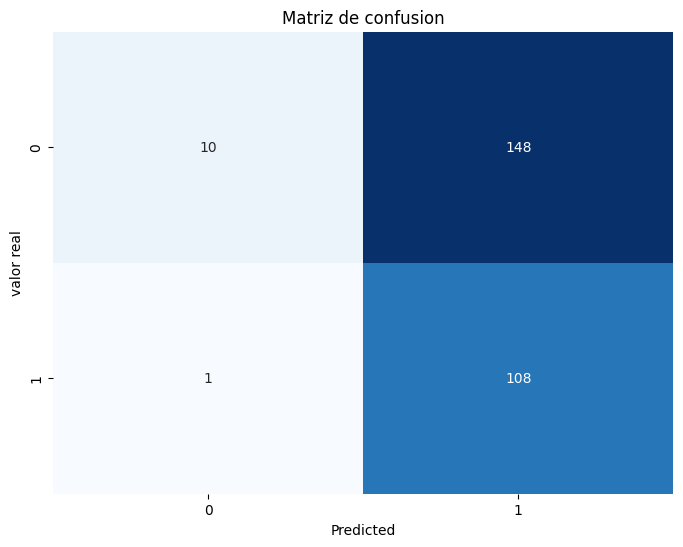

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('valor real')
plt.title('Matriz de confusion')
plt.show()


### Ejemplo con dataset de iris

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

In [20]:
data = load_iris()

In [21]:
X = data['data']
columns = list(data['feature_names'])
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
Y = data['target']
labels = list(data['target_names'])
print(labels)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


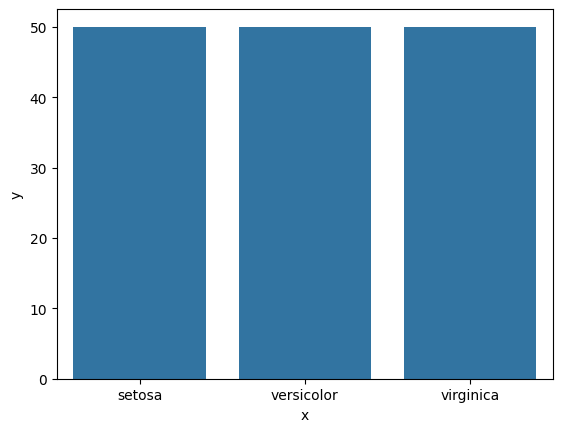

In [23]:
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()                                         # Has to be sorted for correct labeling.
raw_data = {'x': labels, 'y': table.values}
sns.barplot(x='x', y='y', data=raw_data)
plt.show()

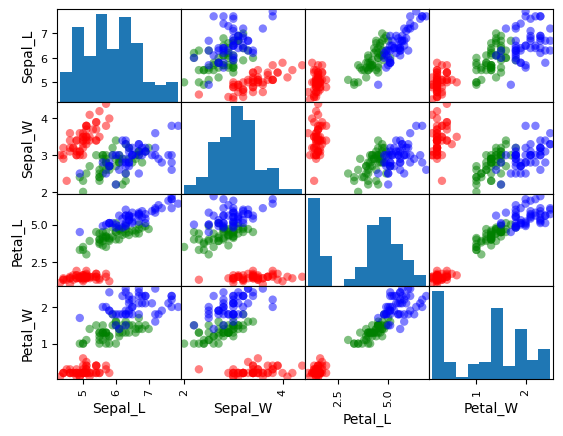

In [24]:
X_df = pd.DataFrame(X,columns=['Sepal_L','Sepal_W','Petal_L','Petal_W'])
my_cols_dict = {0:'red', 1:'green', 2:'blue'}
my_cols = pd.Series(Y).apply(lambda x: my_cols_dict[x])
pd.plotting.scatter_matrix(X_df, c=my_cols, marker='o', alpha=0.5)
plt.show()

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [27]:
GNB = GaussianNB()
GNB.fit(X_train,Y_train)
Y_pred_test = GNB.predict(X_test)

In [28]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test, Y_pred_test)
print(conf_mat)

[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]


In [29]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        17
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



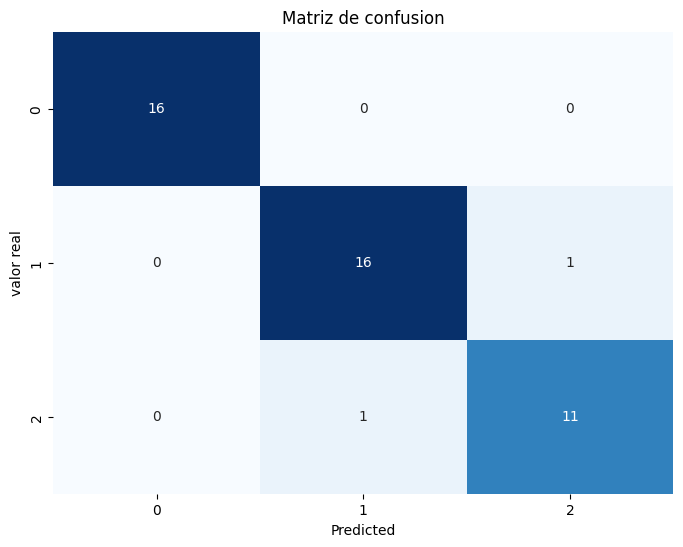

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('valor real')
plt.title('Matriz de confusion')
plt.show()

In [32]:
centers = GNB.theta_
variances = GNB.var_

In [33]:
for i in range(4):
    x_min = X[:,i].min()
    x_max = X[:,i].max()
    x_range = x_max-x_min
    x_grid = np.linspace(x_min-x_range/3,x_max+x_range/3,300)
    fig=plt.figure(figsize=(4,2), dpi=100)      # Width, height and DPI setting.
    ax = fig.add_axes([0,0,1,1])                # Left, bottom, width, height.
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Probability')
    for j in range(3):
        center = centers[j,i]
        sigma = np.sqrt(variances[j,i])
        ax.plot(x_grid, st.norm.pdf(x_grid,loc=center,scale=sigma),color=my_cols_dict[j],linestyle="--",label=labels[j])
    ax.legend(loc=0)
    plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

     no_spam       0.00      0.00      0.00         2
        spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


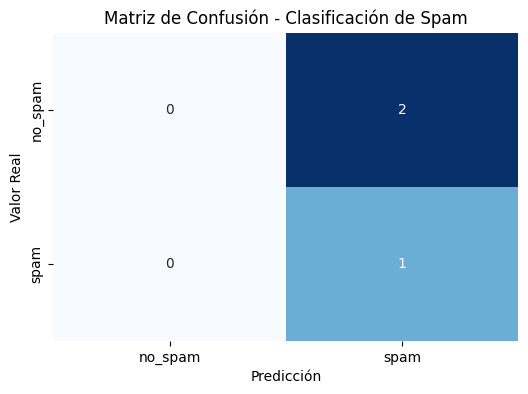


Predicciones para nuevos correos:
'Get a free prize now!' -> spam
'Let's schedule the call.' -> spam


In [31]:
# Ejemplo de clasificaci√≥n de spam con Naive Bayes

# 1. Importar las bibliotecas necesarias
from sklearn.naive_bayes import MultinomialNB # MultinomialNB es adecuado para conteos (como frecuencias de palabras)
from sklearn.feature_extraction.text import CountVectorizer # Para convertir texto a vectores num√©ricos
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Preparar los datos de ejemplo
# Creamos un conjunto de datos simple de mensajes (textos) y sus etiquetas (spam o no_spam)
messages = [
    ('Hey, check out this great offer!', 'spam'),
    ('Meeting at 3 PM tomorrow.', 'no_spam'),
    ('Click here to claim your prize!', 'spam'),
    ('Regarding your request...', 'no_spam'),
    ('You have won a lottery!', 'spam'),
    ('Project update meeting.', 'no_spam'),
    ('Limited time offer, don\'t miss out!', 'spam'),
    ('Hello, how are you?', 'no_spam'),
    ('Urgent: Your account has been compromised!', 'spam'),
    ('Follow up on our discussion.', 'no_spam')
]

df_messages = pd.DataFrame(messages, columns=['text', 'label'])

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X = df_messages['text']
y = df_messages['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Convertir el texto a vectores num√©ricos
# CountVectorizer crea una matriz donde cada fila es un mensaje y cada columna es una palabra.
# El valor en cada celda es la frecuencia de la palabra en el mensaje.
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test) # Usamos 'transform' para el conjunto de prueba

# 5. Crear y entrenar el modelo Naive Bayes
# Usamos MultinomialNB porque estamos trabajando con conteos de palabras.
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# 6. Hacer predicciones
y_pred = model.predict(X_test_counts)

# 7. Evaluar el modelo
print("Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

# Mostrar Matriz de Confusi√≥n
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['no_spam', 'spam'], yticklabels=['no_spam', 'spam'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusi√≥n - Clasificaci√≥n de Spam')
plt.show()

# 8. Ejemplo de predicci√≥n con nuevos datos
new_emails = ["Get a free prize now!", "Let's schedule the call."]
new_emails_counts = vectorizer.transform(new_emails)
predictions_new = model.predict(new_emails_counts)

print("\nPredicciones para nuevos correos:")
for email, prediction in zip(new_emails, predictions_new):
    print(f"'{email}' -> {prediction}")

Explicaci√≥n de las diferencias de rendimiento del algoritmo Naive Bayes
El rendimiento diferente del algoritmo Gaussian Naive Bayes (GNB) en los tres casos (ejemplo simple de compra de coche, Titanic e Iris) se debe a varios factores relacionados con los datos, las suposiciones del algoritmo y la complejidad del problema. A continuaci√≥n, se detalla por qu√© el conjunto de datos Iris obtuvo mejores resultados, en comparaci√≥n con los otros.

1. Caracter√≠sticas y tama√±o de los conjuntos de datos

Ejemplo simple de compra de coche:

Tama√±o: Muy peque√±o (10 muestras, divididas en 8 para entrenamiento y 2 para prueba).
Problema: Con tan pocos datos, el modelo puede "memorizar" patrones (sobreajuste), pero el rendimiento en la prueba es poco fiable, casi aleatorio. La precisi√≥n podr√≠a parecer alta (por ejemplo, 1.00 si ambas muestras de prueba son correctas) o baja, pero no es representativa debido a la alta varianza.
Impacto: Los datos peque√±os no permiten al modelo aprender relaciones estad√≠sticas robustas.


Conjunto de datos Titanic:

Tama√±o: M√°s grande (~891 muestras, divididas 70/30 en ~623 para entrenamiento y ~268 para prueba).
Problema: Es desbalanceado (~38% sobrevivientes vs. 62% no sobrevivientes), tiene caracter√≠sticas mixtas (continuas como Edad/Ingresos, categ√≥ricas como Pclass/Sex si est√°n codificadas num√©ricamente) y ruido del mundo real (valores faltantes, outliers). Esto lo hace un problema m√°s dif√≠cil, con una precisi√≥n t√≠pica de 70-80% para GNB.
Impacto: La complejidad y el desbalance reducen el rendimiento.


Conjunto de datos Iris:

Tama√±o: Mediano (150 muestras, balanceadas en 3 clases, divididas 70/30 en 105 para entrenamiento y 45 para prueba).
Ventaja: Es un conjunto limpio y dise√±ado para pruebas, con caracter√≠sticas continuas (longitud/anchura de s√©palos/p√©talos) que se aproximan a una distribuci√≥n normal y clases bien separadas (especialmente setosa). Esto lleva a un rendimiento excelente (~95-100% de precisi√≥n).
Impacto: El tama√±o suficiente, la limpieza y el balance favorecen a GNB.



Por qu√© Iris es mejor: Los conjuntos m√°s grandes y balanceados permiten a GNB estimar probabilidades con mayor precisi√≥n. El ejemplo simple es demasiado peque√±o, y Titanic tiene m√°s complejidad y desbalance, lo que reduce el rendimiento.

2. Cumplimiento de las suposiciones de GNB
GNB asume que:

Las caracter√≠sticas son independientes entre s√≠.

Las caracter√≠sticas siguen una distribuci√≥n Gaussiana (normal) dentro de cada clase.

Ejemplo simple:

Problema: Edad e ingresos est√°n correlacionados (las personas mayores suelen tener mayores ingresos), lo que viola la suposici√≥n de independencia. Con tan pocas muestras, las distribuciones podr√≠an no ser Gaussianas.
Impacto: Esto lleva a predicciones sub√≥ptimas, aunque la precisi√≥n parezca aceptable en un conjunto de prueba peque√±o.


Titanic:

Problema: Caracter√≠sticas como Edad y Tarifa (Fare) son asim√©tricas (no perfectamente Gaussianas), y hay correlaciones (por ejemplo, Pclass afecta a Fare). Si las caracter√≠sticas categ√≥ricas (como Sexo o Embarcado) est√°n codificadas como n√∫meros sin un manejo adecuado (por ejemplo, codificaci√≥n one-hot), esto no se alinea con GNB. Adem√°s, el ruido (valores faltantes, multicolinealidad) a√±ade error.
Impacto: Las violaciones de las suposiciones reducen la calidad de las estimaciones de probabilidad.


Iris:

Ventaja: Las caracter√≠sticas son en su mayor√≠a independientes y tienen distribuciones aproximadamente Gaussianas por clase. Por ejemplo, la longitud del p√©talo separa bien a setosa de las otras clases.
Impacto: Este ajuste casi perfecto a las suposiciones de GNB mejora la precisi√≥n.



Por qu√© Iris es mejor: Iris cumple mejor con las suposiciones de GNB, mientras que los otros conjuntos tienen correlaciones y distribuciones no Gaussianas, lo que lleva a m√°s errores de clasificaci√≥n.

3. Complejidad del problema y separabilidad de clases

Ejemplo simple:

Clasificaci√≥n: Binaria (comprar/no comprar), con separaci√≥n lineal aproximada.
Problema: Los datos peque√±os dificultan la generalizaci√≥n. Con solo 2 muestras de prueba, los resultados son casi aleatorios.
Impacto: La falta de datos limita el aprendizaje de patrones robustos.


Titanic:

Clasificaci√≥n: Binaria, pero compleja. La supervivencia depende de factores entrelazados (g√©nero, clase, edad). Las clases tienen mucho solapamiento (muchos pasajeros similares en ambos grupos, sobrevivientes/no sobrevivientes).
Problema: Esto genera m√°s falsos positivos/negativos en la matriz de confusi√≥n, reduciendo la precisi√≥n.
Impacto: Es un problema "ruidoso" del mundo real, m√°s dif√≠cil para GNB.


Iris:

Clasificaci√≥n: Multiclase (3 clases), pero simple. Las clases son linealmente separables en el espacio de caracter√≠sticas (especialmente usando p√©talos). Setosa es completamente distinta, y versicolor/virginica tienen un solapamiento m√≠nimo.
Impacto: Esto facilita que GNB trace l√≠mites claros, logrando alta precisi√≥n.



Por qu√© Iris es mejor: Iris es un conjunto "f√°cil", dise√±ado para clasificadores simples. Titanic es m√°s complejo debido al solapamiento y factores externos; el ejemplo simple carece de datos suficientes para manejar incluso una complejidad b√°sica.

4. An√°lisis de las m√©tricas de evaluaci√≥n
Basado en los informes de clasificaci√≥n (classification_report) y matrices de confusi√≥n:

Ejemplo simple:

La precisi√≥n en 2 muestras de prueba es fr√°gil (por ejemplo, podr√≠a variar entre 0.50 y 1.00). No se muestra un informe detallado, pero los resultados son poco confiables debido al tama√±o.


Titanic:

Probablemente muestra precisi√≥n, recall y F1 moderados (por ejemplo, ~0.75 en promedio), con un sesgo hacia la clase mayoritaria (no sobrevivientes). La matriz de confusi√≥n tiene valores fuera de la diagonal debido al solapamiento de clases.
Impacto: El desbalance y la complejidad generan m√°s errores.


Iris:

Alta precisi√≥n, recall y F1 (por ejemplo, 0.95+). La matriz de confusi√≥n es casi perfecta, con pocos errores (si los hay, suelen ser entre versicolor y virginica).
Impacto: La separabilidad de clases lleva a un rendimiento superior.



Por qu√© Iris es mejor: El rendimiento superior en Iris refleja lo bien que los datos se adaptan al modelo, no un cambio en el algoritmo en s√≠.

Recomendaciones para mejorar los otros casos

Para el ejemplo simple y Titanic:

Aumentar datos: Usa conjuntos m√°s grandes para mejorar la generalizaci√≥n.
Preprocesamiento: Aplica transformaciones (por ejemplo, logaritmo para caracter√≠sticas asim√©tricas como Fare) para acercarlas a una distribuci√≥n Gaussiana. Codifica variables categ√≥ricas con one-hot encoding.
Desbalance: Usa t√©cnicas como SMOTE para equilibrar clases en Titanic.
Otros modelos NB: Prueba MultinomialNB si las caracter√≠sticas son conteos o categ√≥ricas.


General:

Verifica las suposiciones de GNB (por ejemplo, grafica distribuciones por clase con sns.histplot).
Usa validaci√≥n cruzada (cross_val_score) para obtener m√©tricas m√°s fiables que una sola divisi√≥n.
Comparte las salidas exactas (precisi√≥n, informes, matrices) para un an√°lisis m√°s detallado.



El √©xito de Iris se debe a su simplicidad, limpieza y cumplimiento de las suposiciones de GNB, mientras que los otros casos enfrentan desaf√≠os por tama√±o, ruido o violaciones de estas suposiciones.

# Algoritmo K-Nearest Neighbors (KNN)

El algoritmo **KNN** (K-vecinos m√°s cercanos) es un m√©todo de
**aprendizaje supervisado** que se basa en la idea de que *instancias
similares tienen resultados similares*.

En lugar de construir un modelo expl√≠cito, KNN almacena todos los datos
de entrenamiento y clasifica o predice bas√°ndose en la cercan√≠a entre
puntos.

------------------------------------------------------------------------

## Funcionamiento general

1.  Se define un valor de **k** (n√∫mero de vecinos a considerar).\
2.  Para un nuevo dato:
    -   Se calcula la distancia entre el nuevo dato y todos los puntos
        del dataset (generalmente Eucl√≠dea, aunque pueden usarse
        Manhattan, Minkowski, etc.).\
    -   Se seleccionan los **k vecinos m√°s cercanos**.\
3.  La predicci√≥n depende del tipo de problema:
    -   **Clasificaci√≥n** ‚Üí se toma la **clase m√°s frecuente** entre los
        vecinos.\
    -   **Regresi√≥n** ‚Üí se toma el **promedio** (o ponderado por
        distancia) de los valores de los vecinos.

------------------------------------------------------------------------

## KNN para Clasificaci√≥n

Ejemplo: Clasificar si una fruta es "manzana" o "pera" en funci√≥n de su
**peso** y **color**.

-   Si k = 3, se buscan los 3 puntos m√°s cercanos.\
-   Si 2 son "manzanas" y 1 es "pera", el algoritmo predice "manzana".

Ventaja: intuitivo y f√°cil de usar.\
Problema: si las clases est√°n desbalanceadas, la mayor√≠a puede dominar
la predicci√≥n.

------------------------------------------------------------------------

## KNN para Regresi√≥n

Ejemplo: Predecir el precio de una casa en funci√≥n de sus
caracter√≠sticas (tama√±o, habitaciones, ubicaci√≥n).

-   Si k = 4, se buscan las 4 casas m√°s similares.\
-   El precio estimado ser√° el **promedio de esos 4 precios**.

Se puede mejorar usando **ponderaci√≥n por distancia**: los vecinos m√°s
cercanos tienen m√°s peso que los m√°s lejanos.

------------------------------------------------------------------------

## Elecci√≥n de k

-   Si **k es muy peque√±o (ej. 1)** ‚Üí el modelo es muy sensible al ruido
    (alta varianza).\
-   Si **k es muy grande** ‚Üí el modelo se vuelve demasiado general (alto
    sesgo).\
-   Una buena pr√°ctica es probar varios valores de k y usar validaci√≥n
    cruzada para elegir el √≥ptimo.

------------------------------------------------------------------------

## Ventajas de KNN

-   Simple e intuitivo.\
-   No hace supuestos sobre la distribuci√≥n de los datos.\
-   Funciona tanto para clasificaci√≥n como para regresi√≥n.\
-   Puede capturar relaciones complejas entre datos.

------------------------------------------------------------------------

## Desventajas de KNN

-   Costoso en predicci√≥n: hay que calcular distancias con todos los
    puntos cada vez.\
-   Sensibilidad a la escala: si las variables est√°n en diferentes
    escalas, las distancias pueden ser enga√±osas (se recomienda
    normalizar).\
-   Sensibilidad al ruido: puntos at√≠picos (outliers) pueden afectar las
    predicciones.\
-   Curse of dimensionality: en datasets con muchas variables, las
    distancias dejan de ser representativas.

------------------------------------------------------------------------

## Ejemplo en Python (Clasificaci√≥n)

``` python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Dataset de flores
X, y = load_iris(return_X_y=True)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo KNN con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicciones
print("Predicciones:", knn.predict(X_test))
print("Precisi√≥n:", knn.score(X_test, y_test))
```

------------------------------------------------------------------------

## Ejemplo en Python (Regresi√≥n)

``` python
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Datos ficticios: tama√±o de casa (m2) y precio (miles de d√≥lares)
X = np.array([[50], [60], [100], [120], [200]])
y = np.array([150, 180, 300, 350, 600])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo KNN con k=3
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

# Predicci√≥n para una casa de 110 m2
print("Precio estimado:", knn_reg.predict([[110]]))
```

------------------------------------------------------------------------

## Resumen

-   KNN Clasificaci√≥n ‚Üí votaci√≥n mayoritaria entre vecinos.\
-   KNN Regresi√≥n ‚Üí promedio (o promedio ponderado) de valores entre
    vecinos.\
-   Es un modelo simple, flexible y no param√©trico, ideal para datasets
    peque√±os y de baja dimensionalidad.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

In [35]:
df = pd.read_csv('data_titanic.csv', header='infer')

In [36]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
df.shape[0]

891

In [41]:
n = df.shape[0]
Age = []                                                               # A temporary list.
for i in range(n):
    if np.isnan(df.Age[i]):
        if ('Mr' in df.Name[i]) or ('Mrs' in df.Name[i]) :
            Age.append(30)                                             # If Mr. or Mrs. in the name, then fill with 30.
        else:
            Age.append(10)                                             # Likely a child. So, fill with 10.
    else:
        Age.append(df.Age[i])
df.Age = pd.Series(Age)

In [42]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    10.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  10.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [45]:
df = df.drop(columns = ['PassengerId','Name','Ticket','Fare','Cabin'])
df.head(3)

Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S

In [46]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [47]:
df=df.dropna(axis=0)
df.shape

(889, 7)

In [48]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


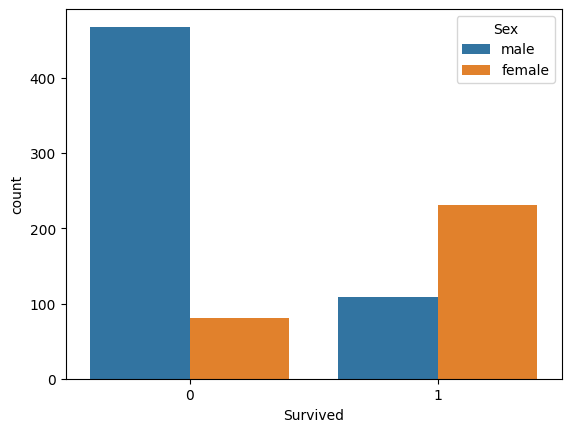

In [50]:
# The frequency table of Survived.
sns.countplot(x='Survived', hue="Sex", data=df)
plt.show()

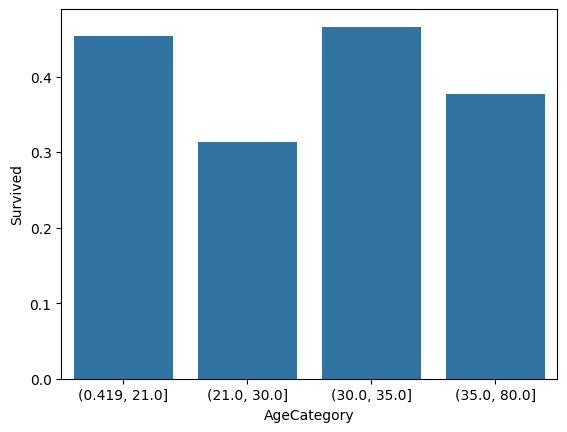

In [51]:
# Survival rate by Age category.
df['AgeCategory'] = pd.qcut(df.Age,4)                   # Using quantiles cut into 4 intervals.
sns.barplot(x='AgeCategory',y='Survived', ci=None, data=df)
plt.show()

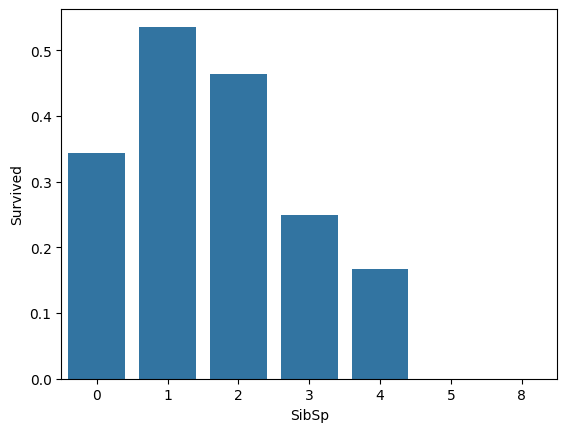

In [52]:
# Survival rate by SibSp category.
sns.barplot(x='SibSp', y='Survived', ci=None, data=df)
plt.show()

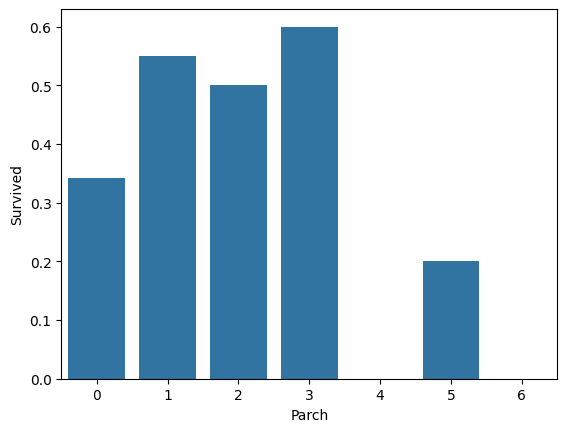

In [53]:
# Survival rate by Parch.
sns.barplot(x='Parch', y='Survived', ci=None, data=df)
plt.show()

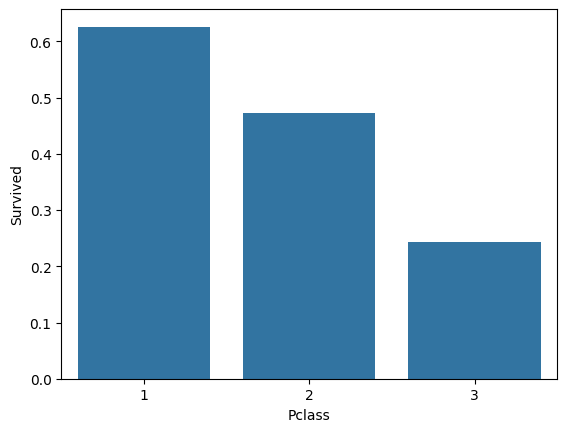

In [54]:
# Survival rate by Pclass.
sns.barplot(x='Pclass', y='Survived', ci=None, data=df)
plt.show()

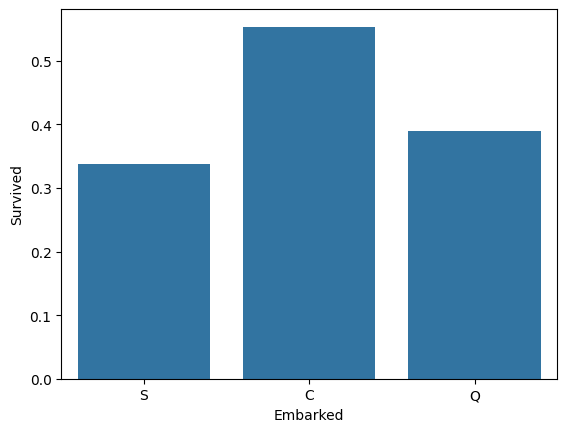

In [55]:
# Survival rate by Embarked.
sns.barplot(x='Embarked', y='Survived', ci=None, data=df)
plt.show()

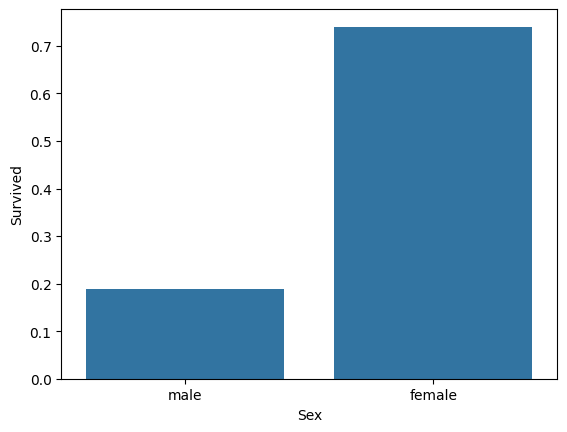

In [56]:
# Survival rate by Sex.
sns.barplot(x='Sex', y='Survived', ci=None,  data=df)
plt.show()

In [57]:
# Convert into dummy variables and then remove the original variables.
df = pd.get_dummies(df.AgeCategory, drop_first=True,prefix='Age').join(df.drop(columns=['Age','AgeCategory']))
df = pd.get_dummies(df.Pclass, drop_first=True,prefix='Pclass').join(df.drop(columns=['Pclass']))
df = pd.get_dummies(df.SibSp, drop_first=True,prefix='SibSp').join(df.drop(columns=['SibSp']))
df = pd.get_dummies(df.Parch, drop_first=True,prefix='Parch').join(df.drop(columns=['Parch']))
df = pd.get_dummies(df.Sex, drop_first=True,prefix='Sex').join(df.drop(columns=['Sex']))
df = pd.get_dummies(df.Embarked, drop_first=True,prefix='Embarked').join(df.drop(columns=['Embarked']))
df.head(5)

Embarked_Q  Embarked_S  Sex_male  Parch_1  Parch_2  Parch_3  Parch_4  \
0       False        True      True    False    False    False    False   
1       False       False     False    False    False    False    False   
2       False        True     False    False    False    False    False   
3       False        True     False    False    False    False    False   
4       False        True      True    False    False    False    False   

   Parch_5  Parch_6  SibSp_1  ...  SibSp_3  SibSp_4  SibSp_5  SibSp_8  \
0    False    False     True  ...    False    False    False    False   
1    False    False     True  ...    False    False    False    False   
2    False    False    False  ...    False    False    False    False   
3    False    False     True  ...    False    False    False    False   
4    False    False    False  ...    False    False    False    False   

   Pclass_2  Pclass_3  Age_(21.0, 30.0]  Age_(30.0, 35.0]  Age_(35.0, 80.0]  \
0     False      True              True             False             False   
1     False     False             False             False              True   
2     False      True              True             False             False   
3     False     False             False              True             False   
4     False      True             False              True             False   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  

[5 rows x 21 columns]

In [58]:
# Save to an external file.
df.to_csv('data_titanic_2.csv',index=False)

In [59]:
X = df.drop(columns=['Survived'])
Y = df.Survived

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [61]:
# KNN with n_neighbours = 5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, Y_train);
Y_pred = knn5.predict(X_test)
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

[[141  17]
 [ 42  67]]
------------------------
Accuracy : 0.779


In [62]:
# KNN with n_neighbours = 100
knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(X_train, Y_train);
Y_pred = knn100.predict(X_test)
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

[[155   3]
 [ 56  53]]
------------------------
Accuracy : 0.779


In [63]:
accs = []
k_grid = range(1,100,1) # Rango entre el n√∫mero dos y el 100 en pasos de 1 en 1
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accs.append(metrics.accuracy_score(Y_test,Y_pred))

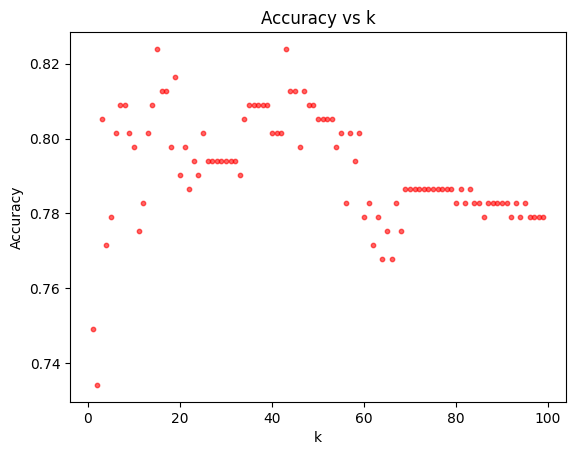

In [64]:
# Visualize.
plt.scatter(k_grid,accs,c='red',marker='o',s=10,alpha=0.6)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

In [65]:
# Parameter grid.
k_grid = np.arange(1,51,1)
parameters = {'n_neighbors':k_grid}

In [66]:
# Optimize the k.
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs = -1, verbose=True)       # "n_jobs = -1" means "use all the CPU cores".
gridCV.fit(X_train, Y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best k : 15


In [67]:
# Test with the best k.
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(X_train, Y_train)
Y_pred = KNN_best.predict(X_test)
print( "Best Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Best Accuracy : 0.824


In [69]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       158
           1       0.90      0.64      0.75       109

    accuracy                           0.82       267
   macro avg       0.85      0.80      0.81       267
weighted avg       0.84      0.82      0.82       267



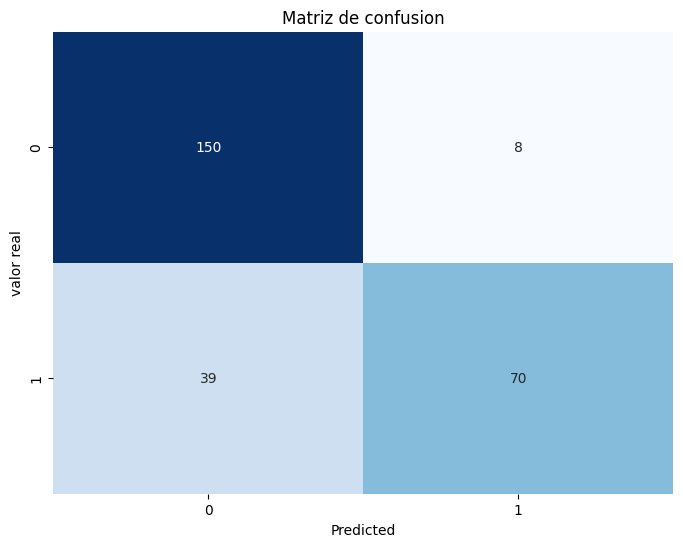

In [70]:
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('valor real')
plt.title('Matriz de confusion')
plt.show()

# KNeighborsClassifier en scikit-learn

## Descripci√≥n de la Funci√≥n
KNeighborsClassifier es un clasificador que implementa el voto de los k vecinos m√°s cercanos. En este algoritmo, un punto de datos se clasifica seg√∫n la mayor√≠a de votos de sus k vecinos m√°s cercanos en el conjunto de entrenamiento. Es un m√©todo de aprendizaje supervisado no param√©trico utilizado para tareas de clasificaci√≥n.

## Par√°metros de Inicializaci√≥n
- **n_neighbors** (tipo: int, valor por defecto: 5):  
  N√∫mero de vecinos a utilizar por defecto para las consultas de kneighbors. Representa el valor de 'k' en el algoritmo KNN, que determina cu√°ntos puntos cercanos se consideran para la clasificaci√≥n.

- **weights** (tipo: {'uniform', 'distance'}, callable o None, valor por defecto: 'uniform'):  
  Funci√≥n de peso utilizada en la predicci√≥n. Posibles valores: 'uniform' para pesos uniformes (todos los vecinos tienen el mismo peso), 'distance' para pesos inversamente proporcionales a la distancia (vecinos m√°s cercanos tienen mayor influencia), o una funci√≥n callable personalizada que toma un array de distancias y devuelve un array de pesos.

- **algorithm** (tipo: {'auto', 'ball_tree', 'kd_tree', 'brute'}, valor por defecto: 'auto'):  
  Algoritmo utilizado para computar los vecinos m√°s cercanos. 'ball_tree' utiliza BallTree, 'kd_tree' utiliza KDTree, 'brute' utiliza b√∫squeda de fuerza bruta, y 'auto' decide el algoritmo m√°s apropiado basado en los valores pasados al m√©todo fit.

- **leaf_size** (tipo: int, valor por defecto: 30):  
  Tama√±o de hoja pasado a BallTree o KDTree. Afecta la velocidad de construcci√≥n y consulta, as√≠ como el uso de memoria requerido para almacenar el √°rbol. El valor √≥ptimo depende de la naturaleza del problema.

- **p** (tipo: float, valor por defecto: 2):  
  Par√°metro de potencia para la m√©trica de Minkowski. Cuando p=1, se usa la distancia de Manhattan (l1); cuando p=2, se usa la distancia euclidiana (l2); para valores arbitrarios de p, se usa la distancia de Minkowski (l_p). Debe ser un valor positivo.

- **metric** (tipo: str o callable, valor por defecto: 'minkowski'):  
  M√©trica utilizada para el c√°lculo de distancias. El valor por defecto es "minkowski", que resulta en la distancia euclidiana cuando p=2. Puede ser una funci√≥n callable personalizada o "precomputed" si se proporciona una matriz de distancias.

- **metric_params** (tipo: dict, valor por defecto: None):  
  Argumentos de palabras clave adicionales para la funci√≥n de m√©trica.

- **n_jobs** (tipo: int, valor por defecto: None):  
  N√∫mero de trabajos paralelos a ejecutar para la b√∫squeda de vecinos. None significa 1 (a menos que est√© en un contexto de joblib.parallel_backend), y -1 significa usar todos los procesadores disponibles. No afecta el m√©todo fit.

# KNeighborsRegressor en scikit-learn

## Descripci√≥n de la Funci√≥n
KNeighborsRegressor es un regresor basado en los k vecinos m√°s cercanos. El objetivo se predice mediante interpolaci√≥n local de los objetivos asociados con los vecinos m√°s cercanos en el conjunto de entrenamiento. Es un m√©todo de aprendizaje supervisado no param√©trico utilizado para tareas de regresi√≥n.

## Par√°metros de Inicializaci√≥n
- **n_neighbors** (tipo: int, valor por defecto: 5):  
  N√∫mero de vecinos a utilizar por defecto para las consultas de kneighbors. Representa el valor de 'k' en el algoritmo KNN, que determina cu√°ntos puntos cercanos se consideran para la predicci√≥n.

- **weights** (tipo: {'uniform', 'distance'}, callable o None, valor por defecto: 'uniform'):  
  Funci√≥n de peso utilizada en la predicci√≥n. Posibles valores: 'uniform' para pesos uniformes (todos los vecinos tienen el mismo peso), 'distance' para pesos inversamente proporcionales a la distancia (vecinos m√°s cercanos tienen mayor influencia), o una funci√≥n callable personalizada que toma un array de distancias y devuelve un array de pesos. Por defecto, se usan pesos uniformes.

- **algorithm** (tipo: {'auto', 'ball_tree', 'kd_tree', 'brute'}, valor por defecto: 'auto'):  
  Algoritmo utilizado para computar los vecinos m√°s cercanos. 'ball_tree' utiliza BallTree, 'kd_tree' utiliza KDTree, 'brute' utiliza b√∫squeda de fuerza bruta, y 'auto' decide el algoritmo m√°s apropiado basado en los valores pasados al m√©todo fit. Nota: la entrada dispersa sobrescribe a fuerza bruta.

- **leaf_size** (tipo: int, valor por defecto: 30):  
  Tama√±o de hoja pasado a BallTree o KDTree. Afecta la velocidad de construcci√≥n y consulta, as√≠ como el uso de memoria requerido para almacenar el √°rbol. El valor √≥ptimo depende de la naturaleza del problema.

- **p** (tipo: float, valor por defecto: 2):  
  Par√°metro de potencia para la m√©trica de Minkowski. Cuando p=1, se usa la distancia de Manhattan (l1); cuando p=2, se usa la distancia euclidiana (l2); para valores arbitrarios de p, se usa la distancia de Minkowski (l_p).

- **metric** (tipo: str, DistanceMetric object o callable, valor por defecto: 'minkowski'):  
  M√©trica utilizada para el c√°lculo de distancias. El valor por defecto es "minkowski", que resulta en la distancia euclidiana cuando p=2. Puede ser una funci√≥n callable personalizada o un objeto DistanceMetric.

- **metric_params** (tipo: dict, valor por defecto: None):  
  Argumentos de palabras clave adicionales para la funci√≥n de m√©trica.

- **n_jobs** (tipo: int, valor por defecto: None):  
  N√∫mero de trabajos paralelos a ejecutar para la b√∫squeda de vecinos. None significa 1 (a menos que est√© en un contexto de joblib.parallel_backend), y -1 significa usar todos los procesadores disponibles. No afecta el m√©todo fit.

# Ejemplos en C√≥digo

## Ejemplo de KNeighborsClassifier
```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn_classifier.predict(X_test)
print("Precisi√≥n:", accuracy_score(y_test, y_pred))
```

## Ejemplo de KNeighborsRegressor
```python
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el regresor KNN
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn_regressor.predict(X_test)
print("Error cuadr√°tico medio:", mean_squared_error(y_test, y_pred))
```

In [73]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Crear y entrenar el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn_classifier.predict(X_test)
print("Precisi√≥n:", accuracy_score(y_test, y_pred))

Precisi√≥n: 0.9777777777777777


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [76]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

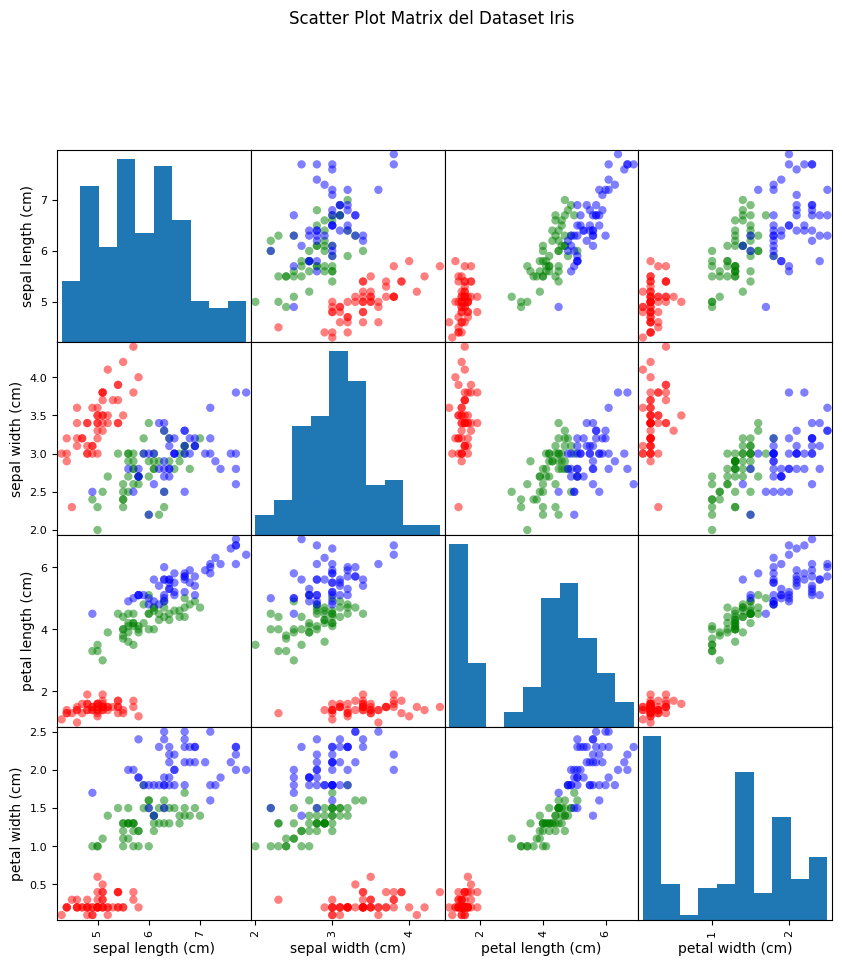

In [75]:
# Crear un DataFrame de pandas con los datos de caracter√≠sticas
X_df = pd.DataFrame(X, columns=columns)

# Asignar colores a las clases
my_cols_dict = {0: 'red', 1: 'green', 2: 'blue'}
my_cols = pd.Series(y).apply(lambda x: my_cols_dict[x])

# Generar el scatter plot matrix
pd.plotting.scatter_matrix(X_df, c=my_cols, marker='o', alpha=0.5, figsize=(10, 10))
plt.suptitle('Scatter Plot Matrix del Dataset Iris', y=1.02) # A√±adir un t√≠tulo general
plt.show()

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos (importante para m√©tricas basadas en distancia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de m√©tricas a probar
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
# Nota: 'hamming' no se usa aqu√≠ porque Iris es un conjunto de datos num√©rico

for metric in metrics:
    # Crear y entrenar el clasificador KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn_classifier.fit(X_train_scaled, y_train)

    # Predecir y evaluar
    y_pred = knn_classifier.predict(X_test_scaled)
    print(f"Precisi√≥n con m√©trica {metric}: {accuracy_score(y_test, y_pred):.3f}")

Precisi√≥n con m√©trica euclidean: 1.000
Precisi√≥n con m√©trica manhattan: 1.000
Precisi√≥n con m√©trica chebyshev: 0.956
Precisi√≥n con m√©trica minkowski: 1.000
Precisi√≥n con m√©trica cosine: 0.889


# M√©tricas de Distancia en KNeighborsClassifier y KNeighborsRegressor

En los algoritmos **KNeighborsClassifier** y **KNeighborsRegressor** de scikit-learn, la elecci√≥n de la m√©trica de distancia es crucial, ya que determina c√≥mo se calcula la cercan√≠a entre los puntos de datos. El par√°metro `metric` permite especificar la m√©trica de distancia a utilizar. A continuaci√≥n, se explican las m√©tricas de distancia m√°s comunes soportadas por scikit-learn para estos algoritmos, junto con una breve descripci√≥n y ejemplos pr√°cticos.

## M√©tricas de Distancia Comunes

### 1. **Minkowski**
   - **Descripci√≥n**: La m√©trica de Minkowski es una generalizaci√≥n de otras m√©tricas de distancia, definida como:
     \[
     D(x, y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{1/p}
     \]
     Donde \( p \) es el par√°metro de potencia especificado por el par√°metro `p`. Cuando \( p=1 \), se convierte en la distancia de Manhattan; cuando \( p=2 \), es la distancia euclidiana. Es la m√©trica por defecto en scikit-learn (`metric='minkowski'`).
   - **Uso**: Adecuada para datos num√©ricos continuos. La elecci√≥n de \( p \) afecta la sensibilidad a las diferencias en las caracter√≠sticas.
   - **Ventajas**: Flexible, ya que permite ajustar \( p \) para adaptarse a diferentes tipos de datos.
   - **Desventajas**: Sensible a la escala de las caracter√≠sticas, por lo que se recomienda escalar los datos (por ejemplo, con StandardScaler).

### 2. **Euclidean (Euclidiana)**
   - **Descripci√≥n**: Es un caso especial de la m√©trica de Minkowski con \( p=2 \). Calcula la distancia en l√≠nea recta entre dos puntos en un espacio euclidiano:
     \[
     D(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
     \]
   - **Uso**: Ideal para datos num√©ricos donde las distancias geom√©tricas son relevantes, como en problemas de clustering o clasificaci√≥n espacial.
   - **Ventajas**: Intuitiva y ampliamente utilizada en espacios continuos.
   - **Desventajas**: Sensible a valores at√≠picos y a diferencias en la escala de las caracter√≠sticas.

### 3. **Manhattan (Cityblock o L1)**
   - **Descripci√≥n**: Es un caso especial de la m√©trica de Minkowski con \( p=1 \). Calcula la suma de las diferencias absolutas entre las coordenadas de dos puntos:
     \[
     D(x, y) = \sum_{i=1}^n |x_i - y_i|
     \]
   - **Uso**: √ötil en datos donde las distancias se miden a lo largo de ejes ortogonales (por ejemplo, en problemas con estructuras en forma de cuadr√≠cula, como en redes urbanas).
   - **Ventajas**: Menos sensible a valores at√≠picos que la distancia euclidiana.
   - **Desventajas**: Puede no capturar bien relaciones no lineales en datos complejos.

### 4. **Chebyshev**
   - **Descripci√≥n**: Calcula la distancia m√°xima entre las coordenadas de dos puntos:
     \[
     D(x, y) = \max_i |x_i - y_i|
     \]
   - **Uso**: Adecuada en problemas donde la mayor diferencia en cualquier dimensi√≥n es la m√°s relevante, como en juegos o sistemas donde una sola caracter√≠stica dominante determina la cercan√≠a.
   - **Ventajas**: Robusta a diferencias menores en otras dimensiones.
   - **Desventajas**: Puede ignorar informaci√≥n √∫til de otras dimensiones.

### 5. **Cosine (Coseno)**
   - **Descripci√≥n**: Mide el √°ngulo entre dos vectores, ignorando la magnitud. La distancia se calcula como:
     \[
     D(x, y) = 1 - \frac{x \cdot y}{\|x\| \|y\|}
     \]
   - **Uso**: Muy utilizada en datos de alta dimensionalidad, como en procesamiento de texto o im√°genes, donde la orientaci√≥n de los vectores es m√°s importante que su magnitud.
   - **Ventajas**: Insensible a la escala de los datos, ideal para datos dispersos o de texto.
   - **Desventajas**: No considera la magnitud de los vectores, lo que puede ser una limitaci√≥n en algunos contextos.

### 6. **Hamming**
   - **Descripci√≥n**: Calcula la proporci√≥n de posiciones en las que dos vectores difieren. Es adecuada para datos categ√≥ricos o binarios:
     \[
     D(x, y) = \frac{\text{n√∫mero de posiciones donde } x_i \neq y_i}{n}
     \]
   - **Uso**: Ideal para datos categ√≥ricos, como cadenas de texto o secuencias binarias.
   - **Ventajas**: Simple y efectiva para datos no num√©ricos.
   - **Desventajas**: No captura relaciones de magnitud, solo diferencias categ√≥ricas.

### 7. **Precomputed**
   - **Descripci√≥n**: Permite al usuario proporcionar una matriz de distancias precalculada en lugar de calcular las distancias internamente. El usuario debe pasar una matriz cuadrada de distancias o disimilaridades.
   - **Uso**: √ötil cuando se desea utilizar una m√©trica personalizada o cuando las distancias ya han sido calculadas.
   - **Ventajas**: Flexibilidad para usar m√©tricas no est√°ndares.
   - **Desventajas**: Requiere precalcular la matriz de distancias, lo que puede ser costoso en t√©rminos de memoria y tiempo para conjuntos de datos grandes.

## Ejemplos en C√≥digo para KNeighborsClassifier y KNeighborsRegressor

### Ejemplo de KNeighborsClassifier con Diferentes M√©tricas
```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos (importante para m√©tricas basadas en distancia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de m√©tricas a probar
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
# Nota: 'hamming' no se usa aqu√≠ porque Iris es un conjunto de datos num√©rico

for metric in metrics:
    # Crear y entrenar el clasificador KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn_classifier.fit(X_train_scaled, y_train)

    # Predecir y evaluar
    y_pred = knn_classifier.predict(X_test_scaled)
    print(f"Precisi√≥n con m√©trica {metric}: {accuracy_score(y_test, y_pred):.3f}")
```

### Ejemplo de KNeighborsRegressor con Diferentes M√©tricas
```python
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de m√©tricas a probar
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
# Nota: 'hamming' no se usa aqu√≠ porque Diabetes es un conjunto de datos num√©rico

for metric in metrics:
    # Crear y entrenar el regresor KNN
    knn_regressor = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_regressor.fit(X_train_scaled, y_train)

    # Predecir y evaluar
    y_pred = knn_regressor.predict(X_test_scaled)
    print(f"Error cuadr√°tico medio con m√©trica {metric}: {mean_squared_error(y_test, y_pred):.3f}")
```

### Ejemplo de KNeighborsClassifier con M√©trica Hamming
La m√©trica Hamming es adecuada para datos categ√≥ricos. A continuaci√≥n, se muestra un ejemplo con datos categ√≥ricos simulados.

```python
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear un conjunto de datos categ√≥rico simulado
np.random.seed(42)
X = np.random.choice(['A', 'B', 'C'], size=(100, 5))  # 100 muestras, 5 caracter√≠sticas categ√≥ricas
y = np.random.choice([0, 1], size=100)  # Etiquetas binarias

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador KNN con m√©trica Hamming
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='hamming')
knn_classifier.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn_classifier.predict(X_test)
print(f"Precisi√≥n con m√©trica Hamming: {accuracy_score(y_test, y_pred):.3f}")
```

### Ejemplo de KNeighborsClassifier con M√©trica Precomputada
Para la m√©trica `precomputed`, se debe proporcionar una matriz de distancias personalizada.

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calcular matrices de distancias precomputadas (usando distancia euclidiana como ejemplo)
train_dist = cdist(X_train, X_train, metric='euclidean')
test_dist = cdist(X_test, X_train, metric='euclidean')

# Crear y entrenar el clasificador KNN con m√©trica precomputada
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='precomputed')
knn_classifier.fit(train_dist, y_train)

# Predecir y evaluar
y_pred = knn_classifier.predict(test_dist)
print(f"Precisi√≥n con m√©trica precomputada: {accuracy_score(y_test, y_pred):.3f}")
```

## Notas Adicionales
- **Escalado de Datos**: Las m√©tricas basadas en distancia (como Euclidean, Manhattan, Minkowski, Chebyshev) son sensibles a la escala de las caracter√≠sticas. Por lo tanto, es fundamental escalar los datos antes de usar estas m√©tricas (por ejemplo, con `StandardScaler`).
- **M√©tricas Personalizadas**: Adem√°s de las m√©tricas predefinidas, puedes definir una funci√≥n de distancia personalizada y pasarla al par√°metro `metric`. La funci√≥n debe tomar dos arrays y devolver un valor de distancia.
- **Hamming y Datos Categ√≥ricos**: La m√©trica Hamming requiere que los datos sean categ√≥ricos o binarios. Si los datos son num√©ricos, considera convertirlos a categor√≠as o usar otra m√©trica.
- **Precomputed y Memoria**: La m√©trica `precomputed` puede ser costosa en t√©rminos de memoria para conjuntos de datos grandes, ya que requiere almacenar matrices de distancias completas.